In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/junhyuk/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/DSL 기초세션/EDA/data.csv")

In [3]:
# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

# Qa, Qd, Qg, Qi, Ql, Qn, Qp, Qt 열 제거
data = data.drop(['QaA', 'QaE', 'QdA', 'QdE', 'QgA', 'QgE', 'QiA', 'QiE', 'QlA', 'QlE', 'QnA', 'QnE',
                  'QpA', 'QpE', 'QtA', 'QtE'], axis=1)

In [4]:
data = data[['QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'age_group', 
             'education', 'engnat', 'familysize', 'gender',
             'hand', 'married', 'urban', 'tp09', 'tp10']]
age = ['10s', '20s', '30s', '40s', '50s', '60s', '+70s']

- Qq : Most people are basically good and kind
- Qr : One should take action only when sure it is morally right
- Qs : It is wise to flatter important people
- tp09 : Calm, emotionally stable
- tp10 : Conventional, uncreative

- QqA : 연령대가 높을수록 대부분의 사람들이 기본적으로 친절하고 착하다고 생각하는 사람들이 많아짐
- QrA : 연령대가 높아질수록 윤리적인 올바름에 민감해짐
- QsA : 연령대가 높을수록 아첨하는 것이 옳지 않다 생각한다는 사람들이 많아짐
- tp09 : 연령대가 높을수록 감정적으로 자신이 안정적이고 차분하다고 생각하는 사람들이 많아짐
- tp10 : 연령대가 높아질수록 실제 본인들이 생각하기에 보수적이고, 비창의적이라고 생각하지 않는 사람들이 많음.

In [184]:
data['tp09']=7-data['tp09']
data['tp10']=7-data['tp10']

In [90]:
familysize = pd.pivot_table(data=data, index='familysize', columns='QqA', aggfunc='size').T
familysize.iloc[:,:7]

familysize,0,1,2,3,4,5,6
QqA,,,,,,,
1.0,373.0,1865.0,4328.0,2570.0,1073.0,421.0,190.0
2.0,249.0,1332.0,3752.0,2244.0,994.0,379.0,129.0
3.0,218.0,1208.0,3258.0,1989.0,819.0,303.0,128.0
4.0,219.0,1357.0,4104.0,2710.0,1162.0,482.0,192.0
5.0,158.0,773.0,2476.0,1743.0,859.0,377.0,199.0


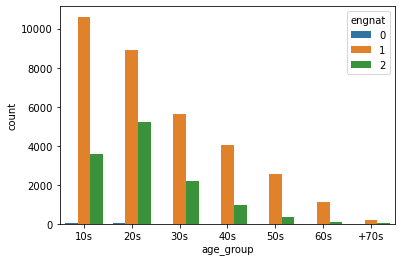

In [5]:
sns.countplot(data = data, x='age_group', hue='engnat', order=age)
plt.show()

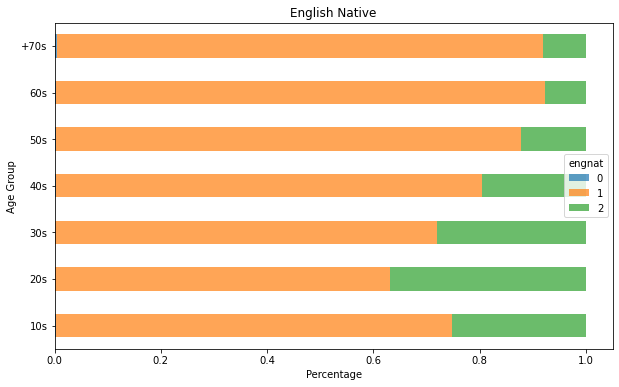

In [6]:
eng_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'engnat', aggfunc='size')

eng_pivot = eng_pivot.div(eng_pivot.sum(axis=1), axis=0)

eng_pivot = eng_pivot.reindex(index=age)

eng_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('English Native')
plt.show()

- 20대, 30대, 10대가 모국어가 영어가 아닌 사람들이 많음

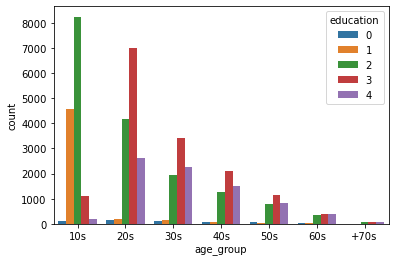

In [15]:
sns.countplot(data = data, x='age_group', hue='education', order=age)
plt.show()

In [26]:
edu_pivot

education,0,1,2,3,4
age_group,,,,,
10s,115.0,4573.0,8239.0,1114.0,174.0
20s,134.0,207.0,4165.0,6992.0,2614.0
30s,111.0,157.0,1925.0,3401.0,2242.0
40s,78.0,80.0,1282.0,2116.0,1495.0
50s,59.0,48.0,804.0,1134.0,844.0
60s,26.0,14.0,350.0,406.0,398.0
+70s,5.0,9.0,70.0,64.0,87.0


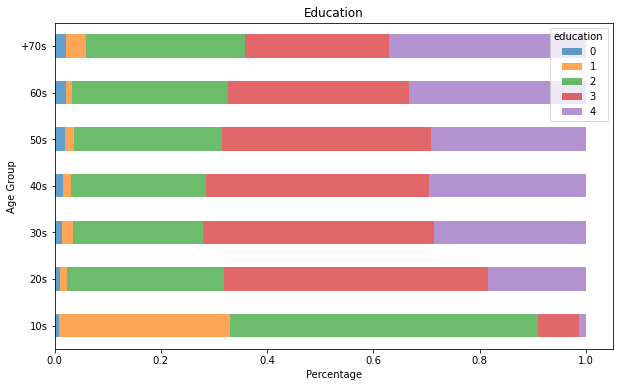

In [30]:
edu_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'education', aggfunc='size')

edu_pivot = edu_pivot.div(edu_pivot.sum(axis=1), axis=0)

edu_pivot = edu_pivot.reindex(index=age)

edu_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Education')
plt.show()

- 10대에서 중졸, 고졸의 비율이 많고 의외로 대졸도 있음
- 70대도 중졸, 고졸 비율이 높고 대졸보다 오히려 석사졸 비율이 높음
- 20대의 경우 대졸 비율이 가장 큼
- 연령대가 높아질수록 대졸보다 석사졸의 비율이 많아짐

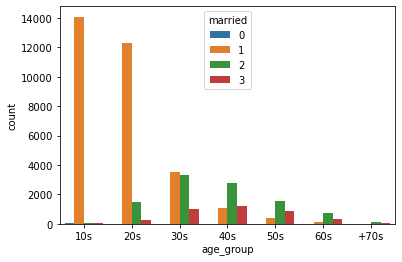

In [16]:
sns.countplot(data = data, x='age_group', hue='married', order=age)
plt.show()

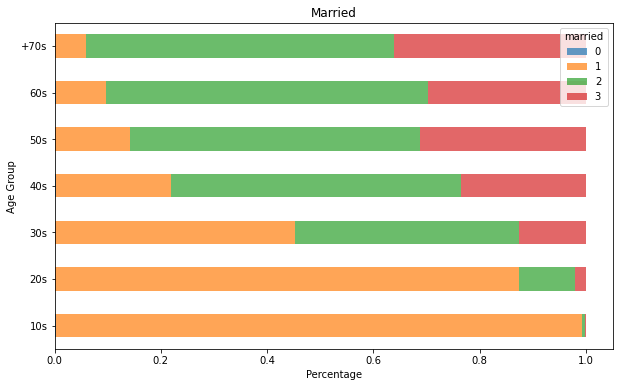

In [31]:
married_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'married', aggfunc='size')

married_pivot = married_pivot.div(married_pivot.sum(axis=1), axis=0)

married_pivot = married_pivot.reindex(index=age)

married_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Married')
plt.show()

- 연령대가 높아질수록 기혼인 사람들이 많아지고 자연스럽게 이혼한 사람들 또한 많아짐

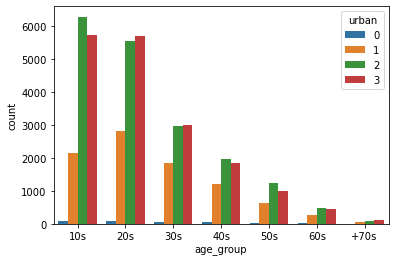

In [17]:
sns.countplot(data = data, x='age_group', hue='urban', order=age)
plt.show()

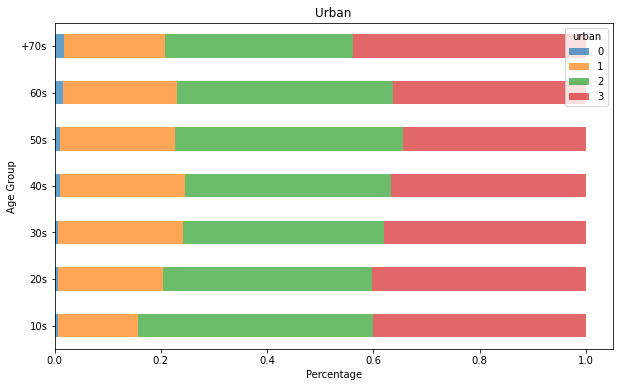

In [32]:
urban_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'urban', aggfunc='size')

urban_pivot = urban_pivot.div(urban_pivot.sum(axis=1), axis=0)

urban_pivot = urban_pivot.reindex(index=age)

urban_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Urban')
plt.show()

- 30대~60대까지 교외지역의 비율이 높게 나오는데 타 연령대에 비해 큰 차이는 없음

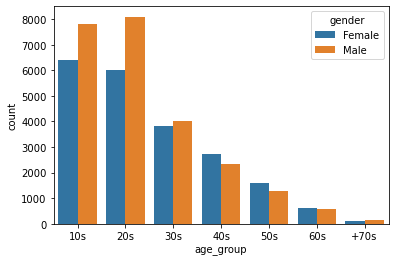

In [18]:
sns.countplot(data = data, x='age_group', hue='gender', order=age)
plt.show()

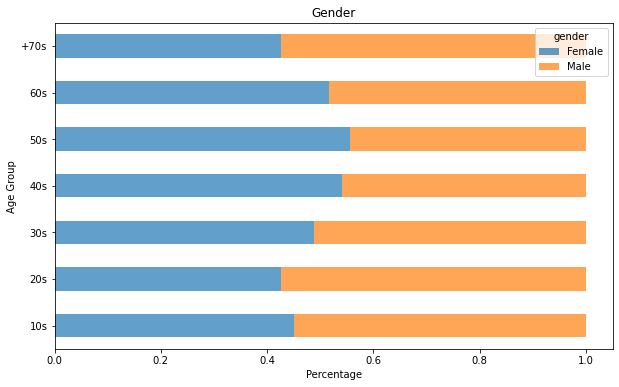

In [33]:
gender_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'gender', aggfunc='size')

gender_pivot = gender_pivot.div(gender_pivot.sum(axis=1), axis=0)

gender_pivot = gender_pivot.reindex(index=age)

gender_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Gender')
plt.show()

- 70대를 제외한 어린 연령대일수록 남성 비율이이 높고 
- 연령대가 높아지면서 여성 비율이 높아짐

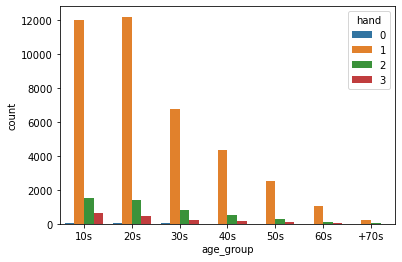

In [34]:
sns.countplot(data = data, x='age_group', hue='hand', order=age)
plt.show()

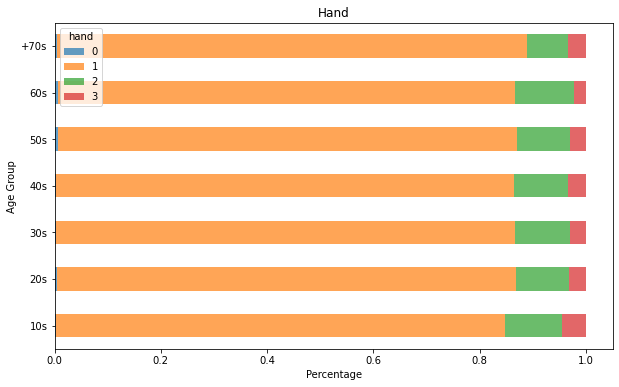

In [35]:
hand_pivot = pd.pivot_table(data = data, index = 'age_group',
                          columns = 'hand', aggfunc='size')

hand_pivot = hand_pivot.div(hand_pivot.sum(axis=1), axis=0)

hand_pivot = hand_pivot.reindex(index=age)

hand_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Hand')
plt.show()

- 손 사용에 있어서는 10대가 양손잡이 비율이 높은 것, 60대에서 왼손 비율이 높은 것을 빼면 특이사항 없음

# QqA
## QqA 응답 별 구성 비율

In [235]:
for i in ('QqA', 'QrA', 'QsA'):
    globals()['{}_engnat_pivot'.format(i)] = pd.pivot_table(data=data, index='engnat', columns=i, aggfunc='size').T
    globals()['{}_engnat_pivot'.format(i)] = globals()['{}_engnat_pivot'.format(i)].div(globals()['{}_engnat_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_education_pivot'.format(i)] = pd.pivot_table(data=data, index='education', columns=i, aggfunc='size').T
    globals()['{}_education_pivot'.format(i)] = globals()['{}_education_pivot'.format(i)].div(globals()['{}_education_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_married_pivot'.format(i)] = pd.pivot_table(data=data, index='married', columns=i, aggfunc='size').T
    globals()['{}_married_pivot'.format(i)] = globals()['{}_married_pivot'.format(i)].div(globals()['{}_married_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_urban_pivot'.format(i)] = pd.pivot_table(data=data, index='urban', columns=i, aggfunc='size').T
    globals()['{}_urban_pivot'.format(i)] = globals()['{}_urban_pivot'.format(i)].div(globals()['{}_urban_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_gender_pivot'.format(i)] = pd.pivot_table(data=data, index='gender', columns=i, aggfunc='size').T
    globals()['{}_gender_pivot'.format(i)] = globals()['{}_gender_pivot'.format(i)].div(globals()['{}_gender_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_hand_pivot'.format(i)] = pd.pivot_table(data=data, index='hand', columns=i, aggfunc='size').T
    globals()['{}_hand_pivot'.format(i)] = globals()['{}_hand_pivot'.format(i)].div(globals()['{}_hand_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_familysize_pivot'.format(i)] = pd.pivot_table(data=data, index='familysize', columns=i, aggfunc='size').T
    globals()['{}_familysize_pivot'.format(i)] = globals()['{}_familysize_pivot'.format(i)].iloc[:,:7]
    globals()['{}_familysize_pivot'.format(i)] = globals()['{}_familysize_pivot'.format(i)].div(globals()['{}_familysize_pivot'.format(i)].sum(axis=1),axis=0)
    

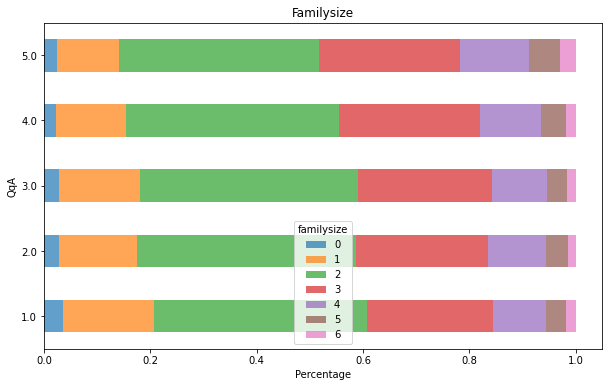

In [96]:
QqA_familysize_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Familysize')
plt.show()

- Agree로 갈수록 가족 구성원 수가 많아지는 경향을 보임

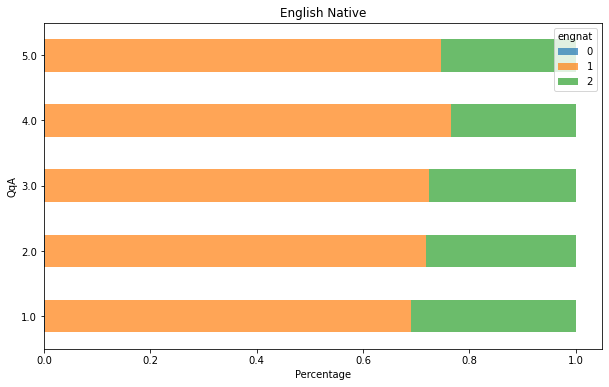

In [45]:
QqA_engnat_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('English Native')
plt.show()

- Disagree로 갈수록 모국어가 영어가 아닌 비율이 높아짐

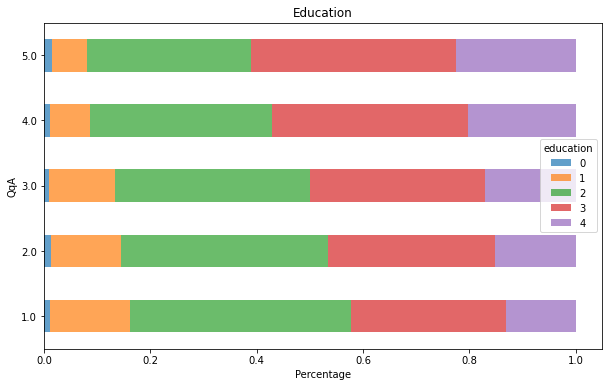

In [78]:
QqA_education_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Education')
plt.show()

- Agree로 갈수록 교육수준이 높은 비율이 많아짐

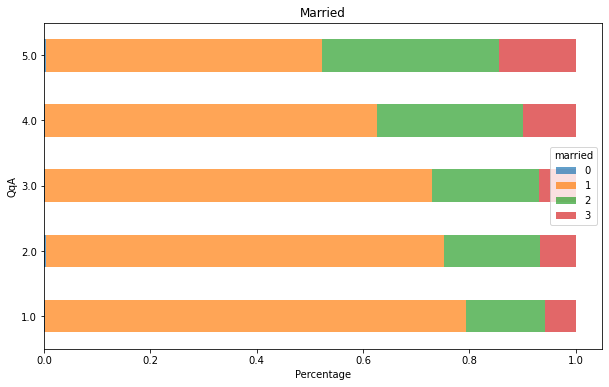

In [47]:
QqA_married_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Married')
plt.show()

- Agree로 갈수록 결혼 및 이혼 비율이 높아짐

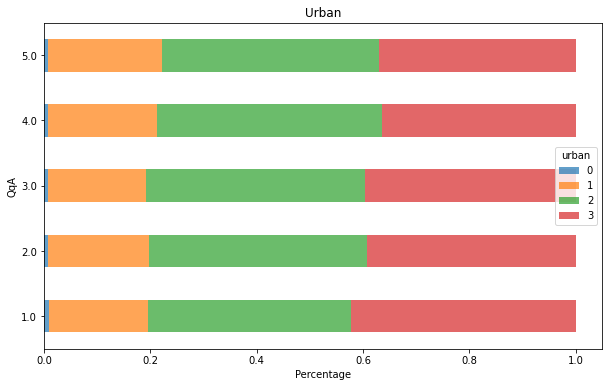

In [48]:
QqA_urban_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Urban')
plt.show()

- 뚜렷한 경향성은 없으나 Disagree의 경우 도시 비율이 높음

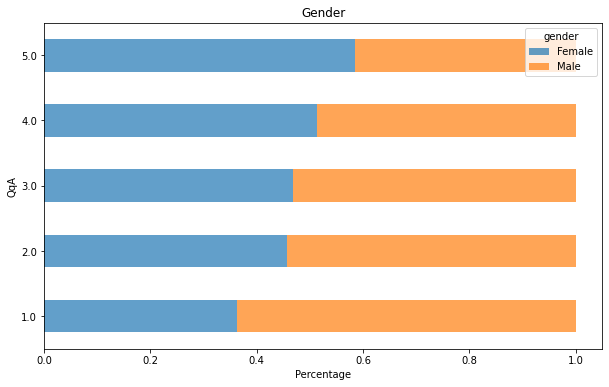

In [49]:
QqA_gender_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Gender')
plt.show()

- 남성은 대체로 Disagree, 여성은 Agree

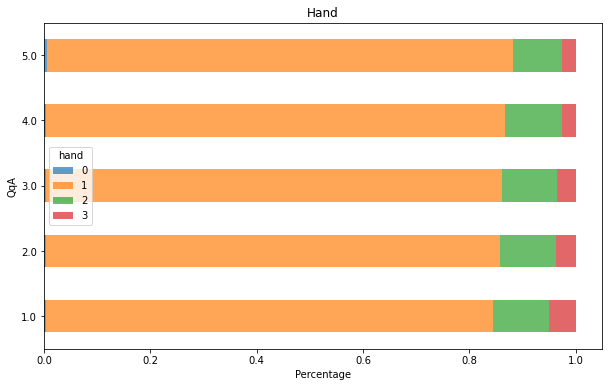

In [50]:
QqA_hand_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QqA')
plt.title('Hand')
plt.show()

- Disagree로 갈수록 양손 잡이 비율이 높아짐

## 변수 별 응답 평균

engnat
1    2.888354
0    2.818182
2    2.713378
Name: QqA, dtype: float64


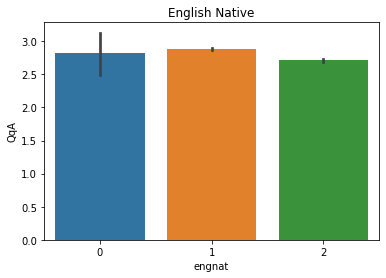

In [216]:
print(data.groupby('engnat').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='engnat', y='QqA', estimator=np.mean)
plt.title('English Native')
plt.show()

- 모국어가 영어 > 모국어가 영어가 아님

education
4    3.109116
3    2.985289
0    2.873106
2    2.704010
1    2.440448
Name: QqA, dtype: float64


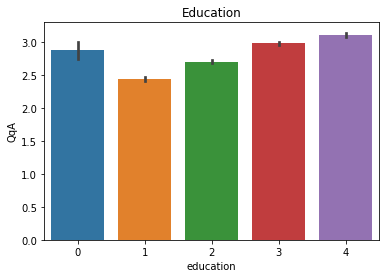

In [133]:
print(data.groupby('education').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='education', y='QqA', estimator=np.mean)
plt.title('Education')
plt.show()

- 교육수준이 높을수록 평균점수가 높음

married
3    3.291123
2    3.242370
0    2.817204
1    2.657686
Name: QqA, dtype: float64


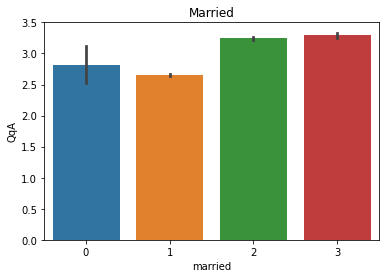

In [134]:
print(data.groupby('married').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='married', y='QqA', estimator=np.mean)
plt.title('Married')
plt.show()

- 이혼 > 기혼 > 미혼

urban
1    2.905489
2    2.878763
3    2.769291
0    2.763975
Name: QqA, dtype: float64


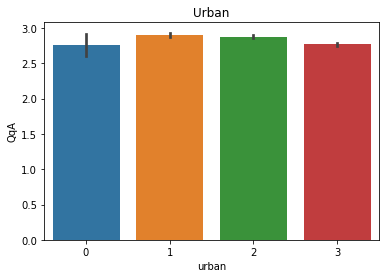

In [135]:
print(data.groupby('urban').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='urban', y='QqA', estimator=np.mean)
plt.title('Urban')
plt.show()

- 시골 > 교외 > 도시

In [149]:
familysize = data.familysize <= 6
family = data[familysize]

familysize
6    3.096659
5    3.007645
4    2.947014
3    2.894456
2    2.812926
1    2.669625
0    2.622021
Name: QqA, dtype: float64


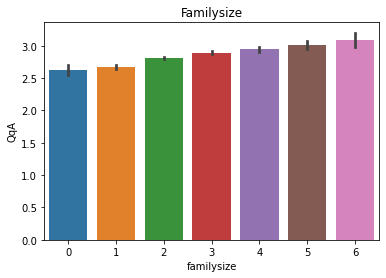

In [152]:
print(family.groupby('familysize').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = family, x='familysize', y='QqA', estimator=np.mean)
plt.title('Familysize')
plt.show()

- 가족 구성원수가 많을수록 높은 점수

gender
Female    3.051654
Male      2.654581
Name: QqA, dtype: float64


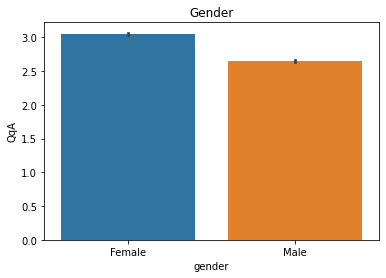

In [136]:
print(data.groupby('gender').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='gender', y='QqA', estimator=np.mean)
plt.title('Gender')
plt.show()

- 여성 > 남성

hand
1    2.858979
0    2.813665
2    2.812020
3    2.479334
Name: QqA, dtype: float64


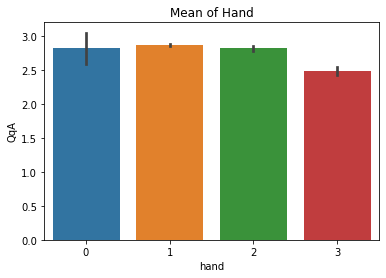

In [131]:
print(data.groupby('hand').mean()['QqA'].sort_values(ascending=False))
sns.barplot(data = data, x='hand', y='QqA', estimator=np.mean)
plt.title('Mean of Hand')
plt.show()

- 오른손 > 왼손 > 양손

# QsA
## 응답 별 구성 비율
### 막대그래프

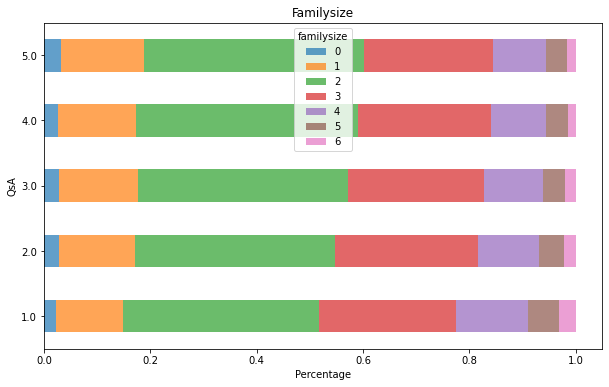

In [236]:
QsA_familysize_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('Familysize')
plt.show()

- 가족 구성원 수가 적을수록 Disagree

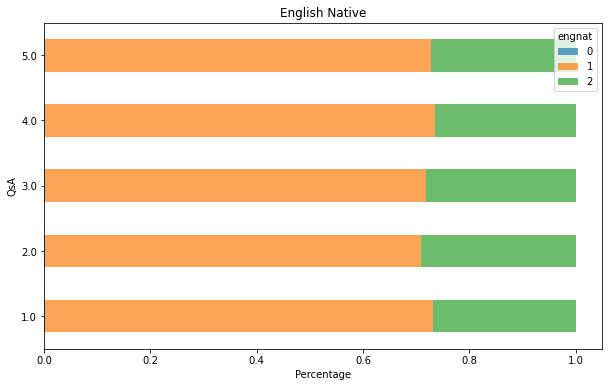

In [51]:
QsA_engnat_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('English Native')
plt.show()

- 딱히 차이 없음

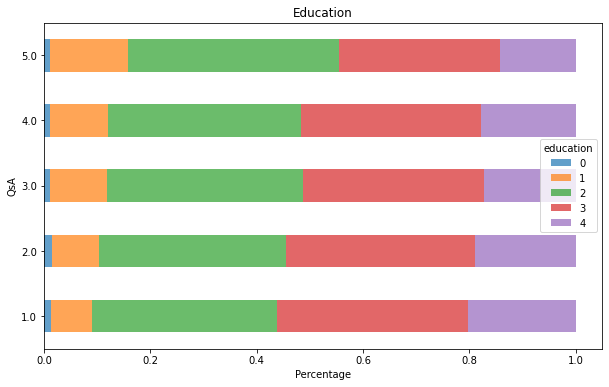

In [52]:
QsA_education_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('Education')
plt.show()

- 교육수준이 낮을수록 Agree비율이 높아짐

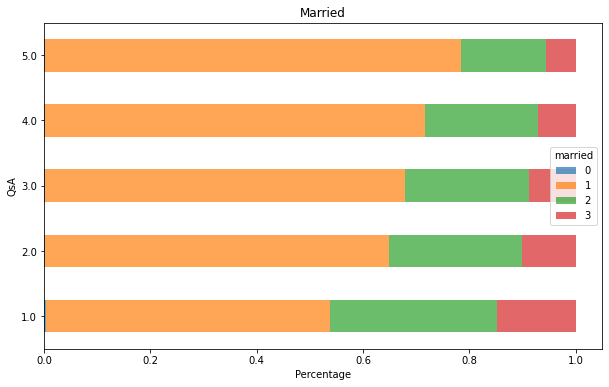

In [53]:
QsA_married_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('Married')
plt.show()

- 미혼일수록 동의함

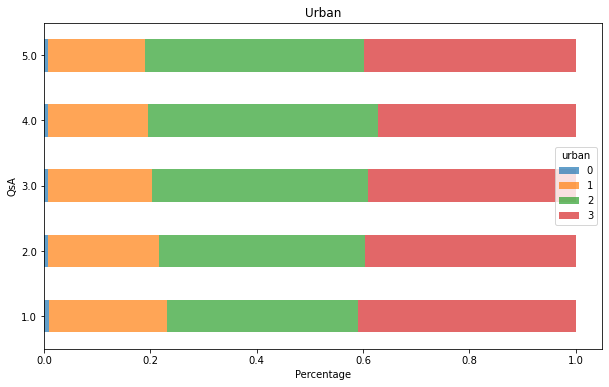

In [54]:
QsA_urban_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('Urban')
plt.show()

- 약간의 경향성으로 Disagree로 갈수록 시골 비율이 높아짐

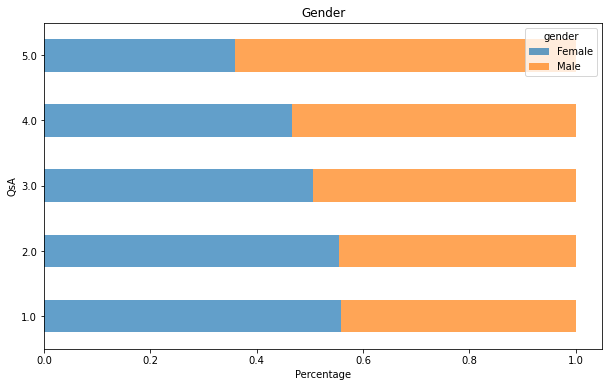

In [55]:
QsA_gender_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('Gender')
plt.show()

- 동의로 갈수록 남성이 많아짐

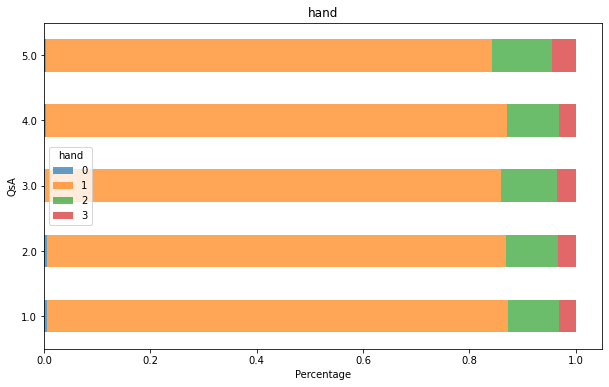

In [79]:
QsA_hand_pivot.plot(kind='barh', figsize=(10,6), stacked=True, alpha = 0.7)

plt.xlabel('Percentage')
plt.ylabel('QsA')
plt.title('hand')
plt.show()

- 왼손, 양손잡이 일수록 Agree

## 변수 별 응답 평균

engnat
0    3.558442
1    3.438045
2    3.418631
Name: QsA, dtype: float64


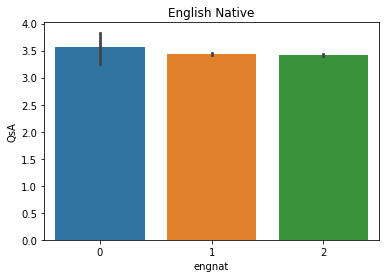

In [153]:
print(data.groupby('engnat').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='engnat', y='QsA', estimator=np.mean)
plt.title('English Native')
plt.show()

- 거의 차이가 없지만 모국어 영어 베이스가 더 높음

education
1    3.703223
2    3.489516
3    3.358377
0    3.344697
4    3.287115
Name: QsA, dtype: float64


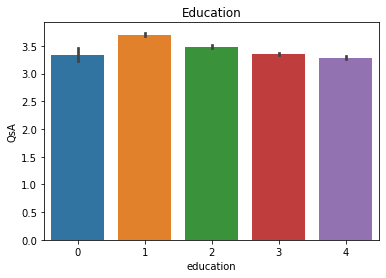

In [156]:
print(data.groupby('education').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='education', y='QsA', estimator=np.mean)
plt.title('Education')
plt.show()

- 교육수준이 낮을수록 점수가 높음

married
1    3.586624
0    3.301075
2    3.134009
3    2.955352
Name: QsA, dtype: float64


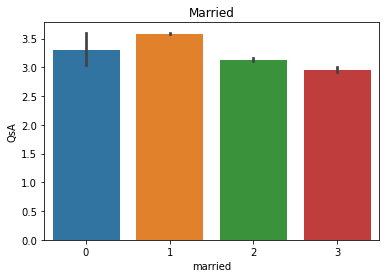

In [157]:
print(data.groupby('married').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='married', y='QsA', estimator=np.mean)
plt.title('Married')
plt.show()

- 미혼 > 기혼 > 이혼

urban
2    3.498651
3    3.413407
1    3.338871
0    3.332298
Name: QsA, dtype: float64


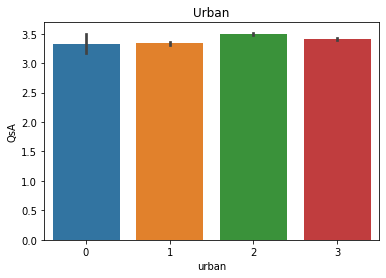

In [158]:
print(data.groupby('urban').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='urban', y='QsA', estimator=np.mean)
plt.title('Urban')
plt.show()

In [ ]:
- 교외 > 도시> 시골

familysize
0    3.563681
1    3.516603
2    3.504967
3    3.402097
4    3.307520
5    3.246687
6    3.105012
Name: QsA, dtype: float64


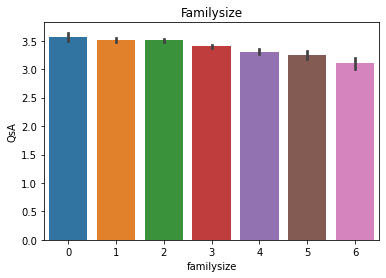

In [159]:
print(family.groupby('familysize').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = family, x='familysize', y='QsA', estimator=np.mean)
plt.title('Familysize')
plt.show()

- 가족구성원수가 적을수록 점수가 높음

gender
Male      3.612710
Female    3.228712
Name: QsA, dtype: float64


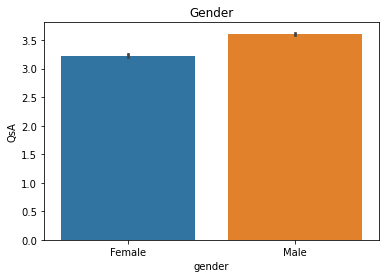

In [160]:
print(data.groupby('gender').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='gender', y='QsA', estimator=np.mean)
plt.title('Gender')
plt.show()

- 남성 > 여성

hand
3    3.589143
2    3.491475
1    3.420759
0    3.111801
Name: QsA, dtype: float64


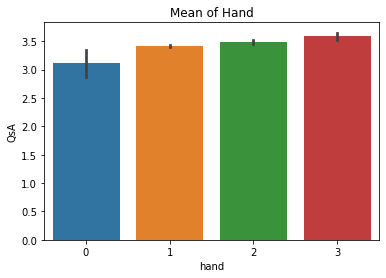

In [161]:
print(data.groupby('hand').mean()['QsA'].sort_values(ascending=False))
sns.barplot(data = data, x='hand', y='QsA', estimator=np.mean)
plt.title('Mean of Hand')
plt.show()

- 양손 > 왼손> 오른손

# QrA
## 응답 별 구성 비율
### 막대그래프

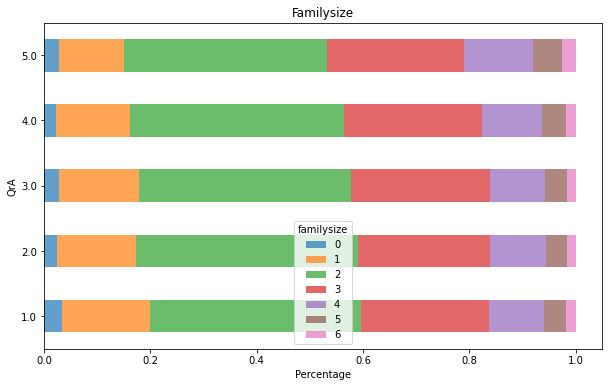

In [237]:
QrA_familysize_pivot.plot(kind='barh',figsize=(10,6), stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Familysize')
plt.show()

- 동의로 갈수록 가족구성원수가 많아짐

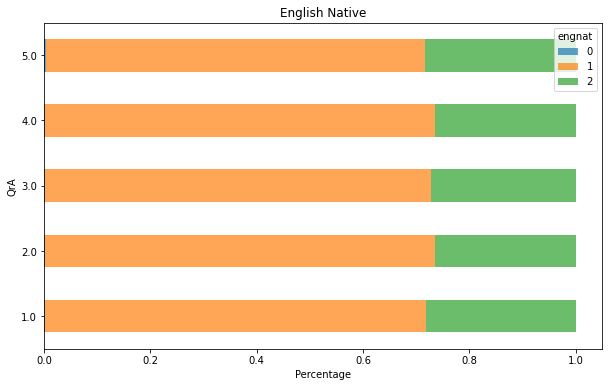

In [219]:
QrA_engnat_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('English Native')
plt.show()

- 뚜렷한 경향 없음

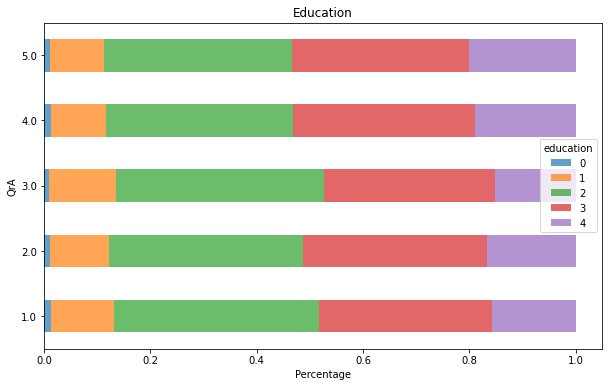

In [220]:
QrA_education_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Education')
plt.show()

- 약간의 경향성으로 동의로 갈수록 교육수준이 높은 비율이 많긴 한데 뚜렷하진 않음

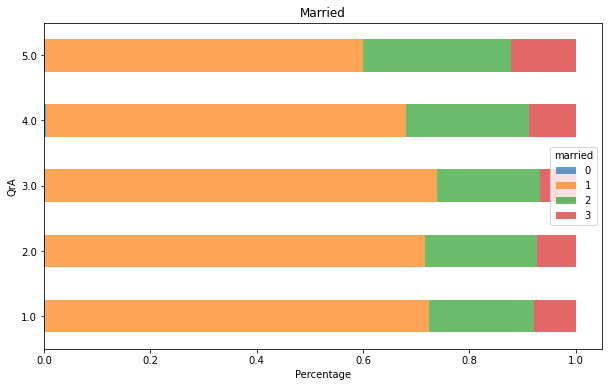

In [221]:
QrA_married_pivot.plot(kind='barh',figsize=(10,6), stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Married')
plt.show()

- 동의로 갈수록 이혼, 기혼이 많아짐

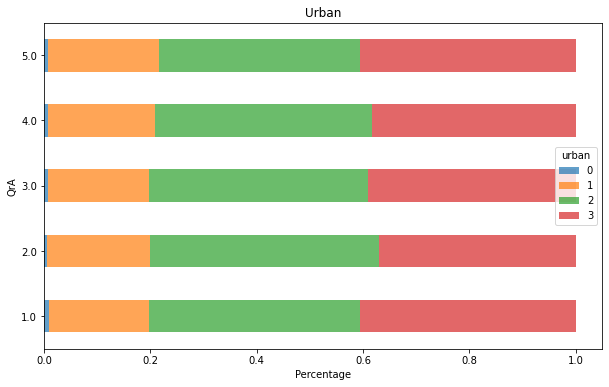

In [222]:
QrA_urban_pivot.plot(kind='barh',figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Urban')
plt.show()

- 관련 없어보임

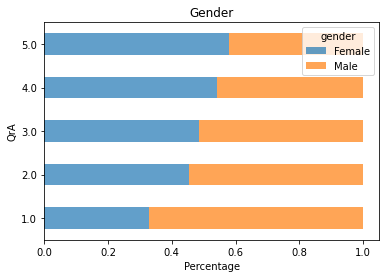

In [21]:
QrA_gender_pivot.plot(kind='barh',stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Gender')
plt.show()

- 부동의로 갈수록 남성비율이 높아짐

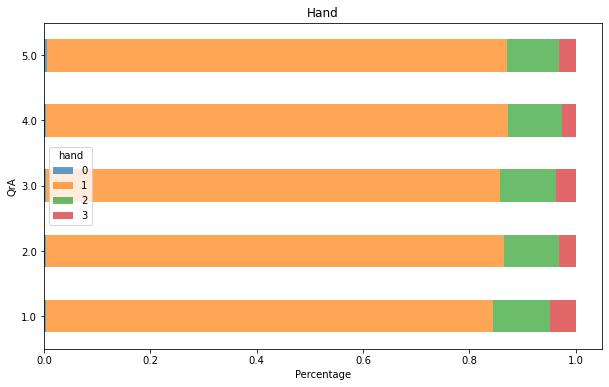

In [223]:
QrA_hand_pivot.plot(kind='barh',figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('QrA')
plt.title('Hand')
plt.show()

- 약간의 경향성으로 양손, 왼손 일수록 동의하지 않음

## 변수 별 응답 평균

engnat
0    3.038961
2    2.823828
1    2.822856
Name: QrA, dtype: float64


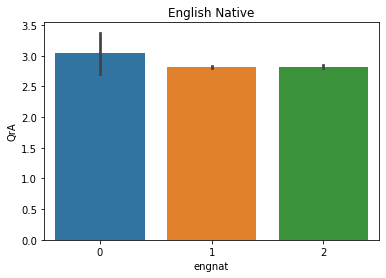

In [162]:
print(data.groupby('engnat').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='engnat', y='QrA', estimator=np.mean)
plt.title('English Native')
plt.show()

- 차이없음

education
4    2.946269
3    2.833060
2    2.780576
0    2.765152
1    2.753341
Name: QrA, dtype: float64


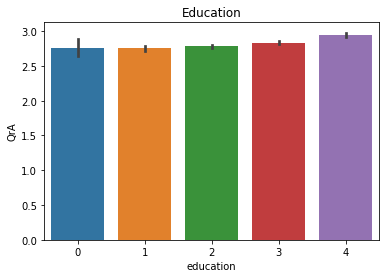

In [163]:
print(data.groupby('education').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='education', y='QrA', estimator=np.mean)
plt.title('Education')
plt.show()

- 교육수준이 높을수록 약간이나마 점수가 더 높아짐

married
3    3.046997
2    2.981111
0    2.967742
1    2.745674
Name: QrA, dtype: float64


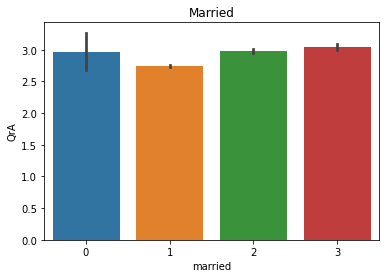

In [164]:
print(data.groupby('married').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='married', y='QrA', estimator=np.mean)
plt.title('Married')
plt.show()

- 이혼 > 기혼 > 미혼

urban
1    2.871815
3    2.826757
0    2.807453
2    2.797399
Name: QrA, dtype: float64


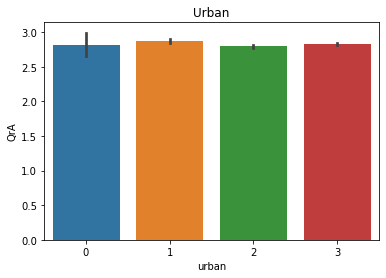

In [165]:
print(data.groupby('urban').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='urban', y='QrA', estimator=np.mean)
plt.title('Urban')
plt.show()

- 시골 > 도시 > 교외

familysize
6    2.974940
5    2.969419
4    2.914000
3    2.857498
2    2.799029
0    2.705012
1    2.688294
Name: QrA, dtype: float64


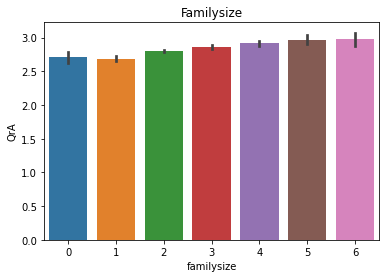

In [166]:
print(family.groupby('familysize').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = family, x='familysize', y='QrA', estimator=np.mean)
plt.title('Familysize')
plt.show()

- 가족구성원 수가 많을수록 점수 높아짐

gender
Female    3.082852
Male      2.595202
Name: QrA, dtype: float64


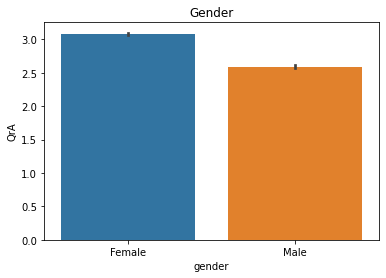

In [167]:
print(data.groupby('gender').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='gender', y='QrA', estimator=np.mean)
plt.title('Gender')
plt.show()

- 여성 > 남성

hand
0    2.950311
1    2.837600
2    2.784740
3    2.582973
Name: QrA, dtype: float64


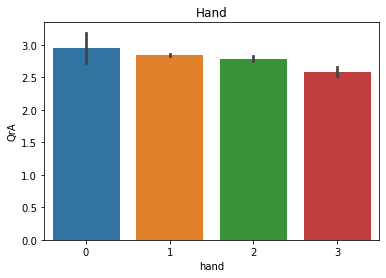

In [168]:
print(data.groupby('hand').mean()['QrA'].sort_values(ascending=False))
sns.barplot(data = data, x='hand', y='QrA', estimator=np.mean)
plt.title('Hand')
plt.show()

- 오른손 > 왼손 > 양손

# tp09
## 응답 별 구성 비율
### 막대그래프

In [238]:
for i in ('tp09', 'tp10'):
    globals()['{}_engnat_pivot'.format(i)] = pd.pivot_table(data=data, index='engnat', columns=i, aggfunc='size').T
    globals()['{}_engnat_pivot'.format(i)] = globals()['{}_engnat_pivot'.format(i)].div(globals()['{}_engnat_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_education_pivot'.format(i)] = pd.pivot_table(data=data, index='education', columns=i, aggfunc='size').T
    globals()['{}_education_pivot'.format(i)] = globals()['{}_education_pivot'.format(i)].div(globals()['{}_education_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_married_pivot'.format(i)] = pd.pivot_table(data=data, index='married', columns=i, aggfunc='size').T
    globals()['{}_married_pivot'.format(i)] = globals()['{}_married_pivot'.format(i)].div(globals()['{}_married_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_urban_pivot'.format(i)] = pd.pivot_table(data=data, index='urban', columns=i, aggfunc='size').T
    globals()['{}_urban_pivot'.format(i)] = globals()['{}_urban_pivot'.format(i)].div(globals()['{}_urban_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_gender_pivot'.format(i)] = pd.pivot_table(data=data, index='gender', columns=i, aggfunc='size').T
    globals()['{}_gender_pivot'.format(i)] = globals()['{}_gender_pivot'.format(i)].div(globals()['{}_gender_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_hand_pivot'.format(i)] = pd.pivot_table(data=data, index='hand', columns=i, aggfunc='size').T
    globals()['{}_hand_pivot'.format(i)] = globals()['{}_hand_pivot'.format(i)].div(globals()['{}_hand_pivot'.format(i)].sum(axis=1),axis=0)
    
    globals()['{}_familysize_pivot'.format(i)] = pd.pivot_table(data=data, index='familysize', columns=i, aggfunc='size').T
    globals()['{}_familysize_pivot'.format(i)] = globals()['{}_familysize_pivot'.format(i)].iloc[:,:7]
    globals()['{}_familysize_pivot'.format(i)] = globals()['{}_familysize_pivot'.format(i)].div(globals()['{}_familysize_pivot'.format(i)].sum(axis=1),axis=0)

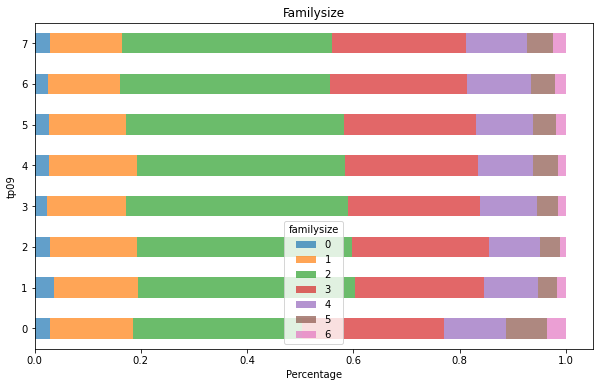

In [240]:
tp09_familysize_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('Familysize')
plt.show()

- 동의로 갈수록 가족 구성원수가 많아짐

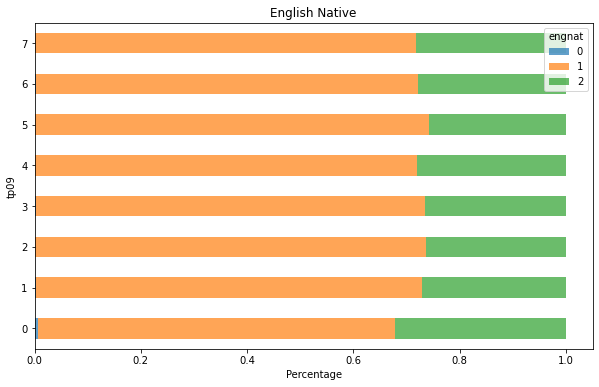

In [228]:
tp09_engnat_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('English Native')
plt.show()

- 뚜렷한 경향성은 보여주지 않음

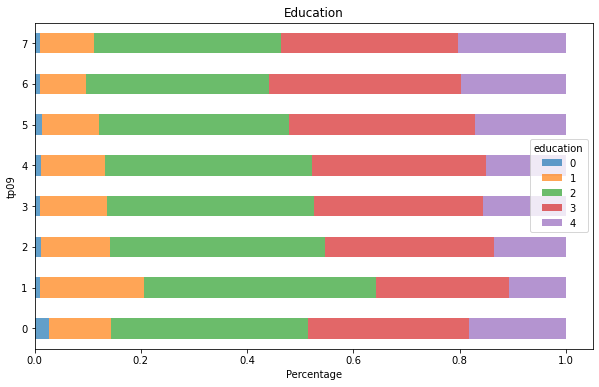

In [229]:
tp09_education_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('Education')
plt.show()

- 동의로 갈수록 교육수준이 높아짐

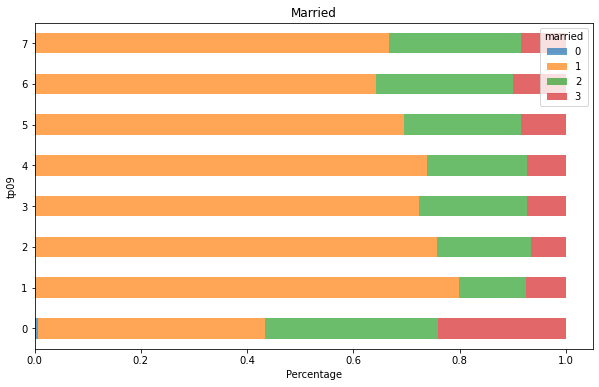

In [230]:
tp09_married_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('Married')
plt.show()

- 동의로 갈수록 기혼비율이 높아짐

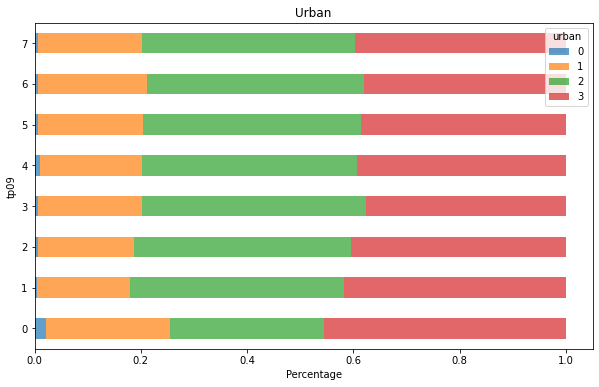

In [231]:
tp09_urban_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('Urban')
plt.show()

- 동의로 갈수록 시골 및 교외 비율이 조금씩 늘어남

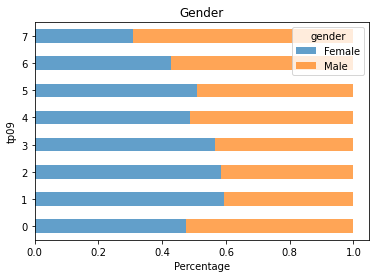

In [200]:
tp09_gender_pivot.plot(kind='barh', stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('Gender')
plt.show()

- 동의로 갈수록 남성 비율이 증가함

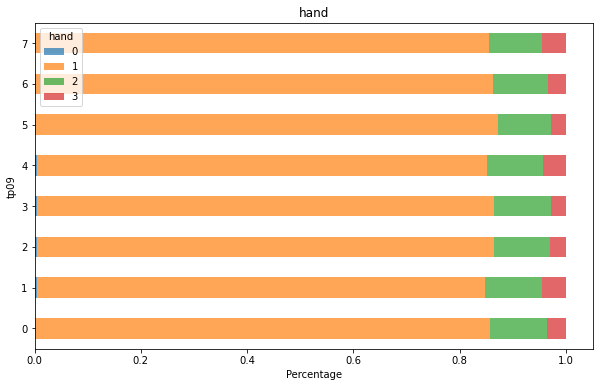

In [232]:
tp09_hand_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp09')
plt.title('hand')
plt.show()

- 뚜렷한 경향성은 보이지 않음. 양손잡이들은 1, 4, 7 에 비율이 높음

## 변수 별 응답 평균

engnat
2    4.748773
1    4.712845
0    4.623377
Name: tp09, dtype: float64


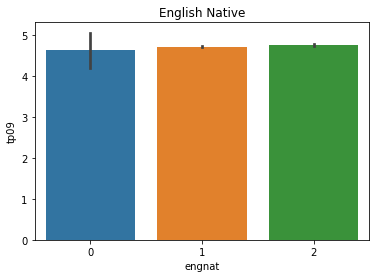

In [202]:
print(data.groupby('engnat').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='engnat', y='tp09', estimator=np.mean)
plt.title('English Native')
plt.show()

- 영어가 아닌 사람들이 조금 더 높으나 차이 크지않음

education
4    5.001019
3    4.827478
0    4.695076
2    4.604514
1    4.371659
Name: tp09, dtype: float64


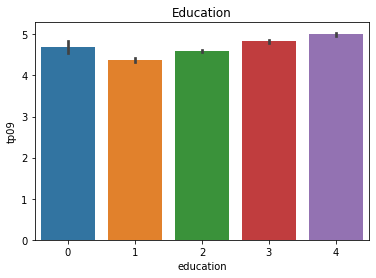

In [203]:
print(data.groupby('education').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='education', y='tp09', estimator=np.mean)
plt.title('Education')
plt.show()

- 교육수준이 높을수록 점수 올라감

married
2    4.983796
0    4.870968
3    4.834987
1    4.625103
Name: tp09, dtype: float64


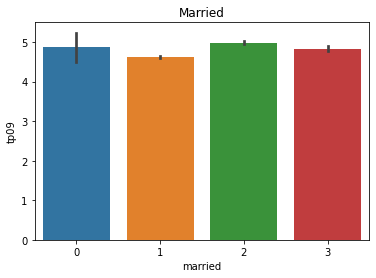

In [204]:
print(data.groupby('married').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='married', y='tp09', estimator=np.mean)
plt.title('Married')
plt.show()

- 기혼 > 이혼 > 미혼

urban
1    4.773487
2    4.718679
3    4.701807
0    4.673913
Name: tp09, dtype: float64


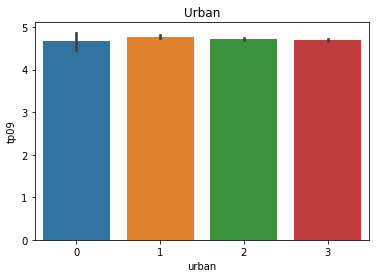

In [205]:
print(data.groupby('urban').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='urban', y='tp09', estimator=np.mean)
plt.title('Urban')
plt.show()

- 시골 > 교외 > 도시

familysize
1    2.395409
0    2.332786
2    2.299364
3    2.272033
4    2.175871
5    2.149337
6    1.992840
Name: tp09, dtype: float64


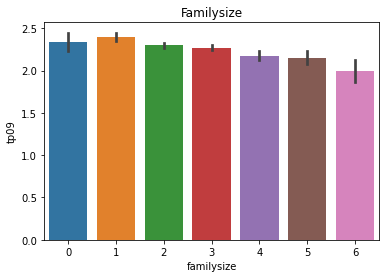

In [241]:
print(family.groupby('familysize').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = family, x='familysize', y='tp09', estimator=np.mean)
plt.title('Familysize')
plt.show()

- 가족 구성원이 적을수록 점수가 높음?

gender
Male      5.021720
Female    4.382548
Name: tp09, dtype: float64


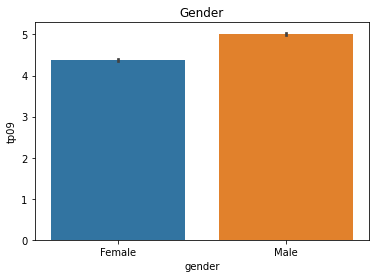

In [207]:
print(data.groupby('gender').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='gender', y='tp09', estimator=np.mean)
plt.title('Gender')
plt.show()

- 남성 > 여성

hand
3    4.822949
1    4.723181
2    4.684783
0    4.645963
Name: tp09, dtype: float64


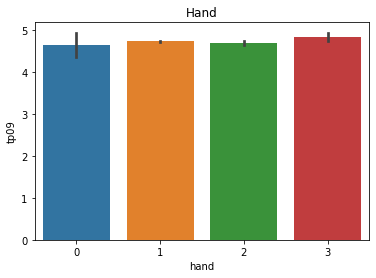

In [208]:
print(data.groupby('hand').mean()['tp09'].sort_values(ascending=False))
sns.barplot(data = data, x='hand', y='tp09', estimator=np.mean)
plt.title('Hand')
plt.show()

- 양손 > 오른손 > 왼손

# tp10
## 응답 별 구성 비율
### 막대그래프

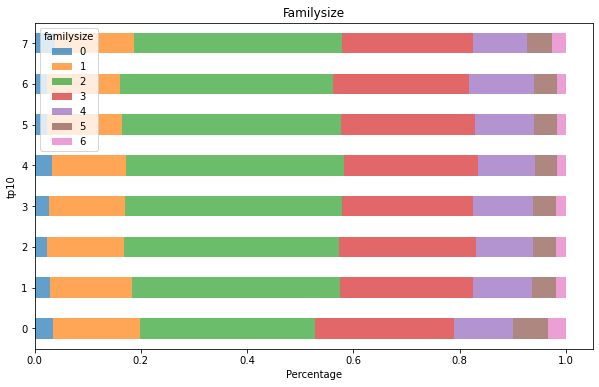

In [242]:
tp10_familysize_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('Familysize')
plt.show()

- 뚜렷한 경향성은 없어보이나 가족 구성원수가 많아질수록 동의에 많이 분포

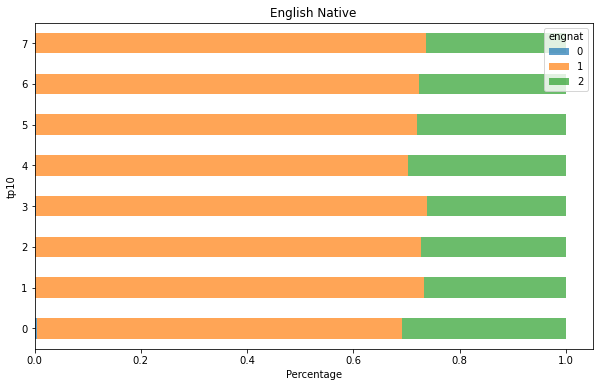

In [243]:
tp10_engnat_pivot.plot(kind='barh',figsize=(10,6), stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('English Native')
plt.show()

- 뚜렷한 경향성 없음

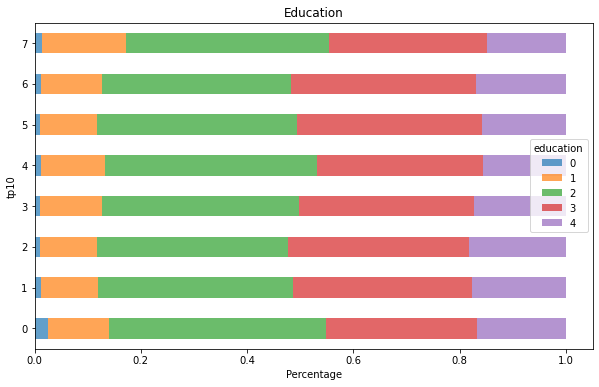

In [244]:
tp10_education_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('Education')
plt.show()

- 강력한 동의에서 저학력의 비율이 높고 강력한 비동의에서 고학력 비율이 높음

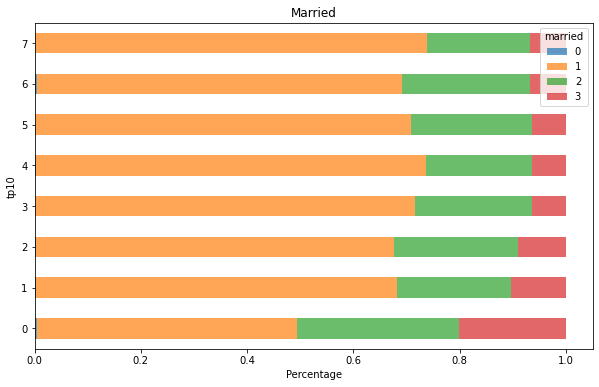

In [245]:
tp10_married_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('Married')
plt.show()

- 비동의로 갈수록 이혼 비율이 높아짐

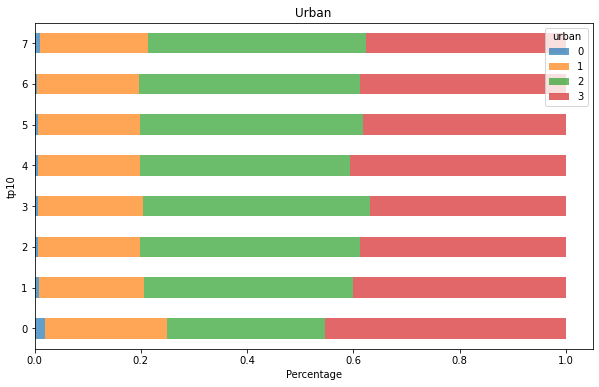

In [246]:
tp10_urban_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('Urban')
plt.show()

- 뚜렷한 경향성은 없어보이나 뭔가 비동의로 갈수록 도시 비율이 높아짐

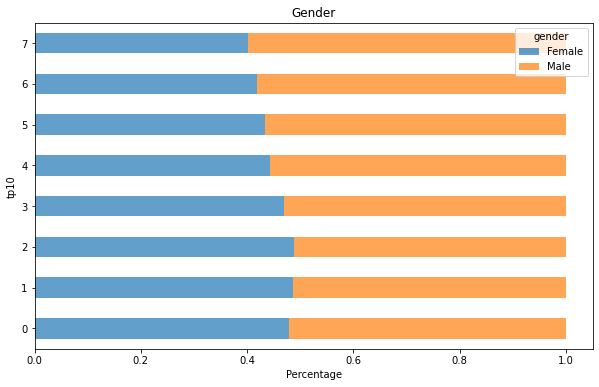

In [247]:
tp10_gender_pivot.plot(kind='barh',figsize=(10,6), stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('Gender')
plt.show()

- 동의로 갈수록 남성이 많음

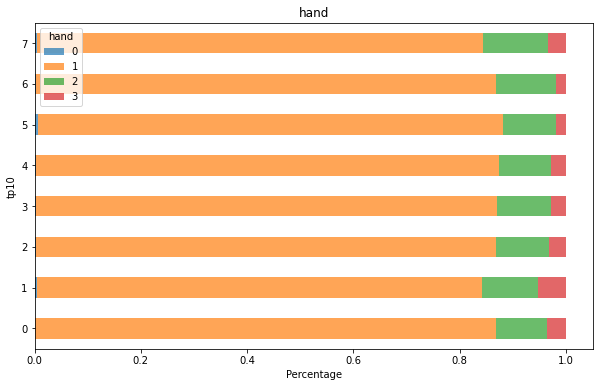

In [248]:
tp10_hand_pivot.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('tp10')
plt.title('hand')
plt.show()

- 비동의로 갈수록 양손잡이 비율이 높음

## 변수 별 응답 평균

engnat
2    2.703644
0    2.688312
1    2.673843
Name: tp10, dtype: float64


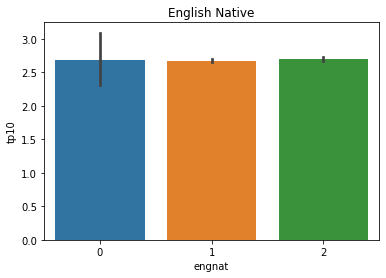

In [191]:
print(data.groupby('engnat').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='engnat', y='tp10', estimator=np.mean)
plt.title('English Native')
plt.show()

- 큰 차이 없음

education
1    2.778302
2    2.701040
3    2.670979
0    2.623106
4    2.604151
Name: tp10, dtype: float64


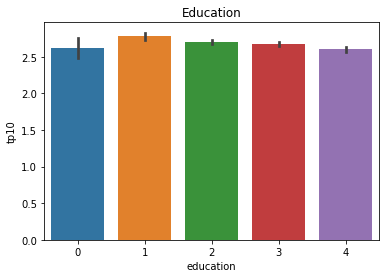

In [190]:
print(data.groupby('education').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='education', y='tp10', estimator=np.mean)
plt.title('Education')
plt.show()

- 교육수준이 낮을수록 점수가 높음

married
1    2.723106
2    2.673824
0    2.623656
3    2.366319
Name: tp10, dtype: float64


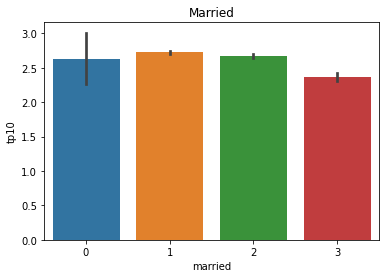

In [189]:
print(data.groupby('married').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='married', y='tp10', estimator=np.mean)
plt.title('Married')
plt.show()

- 미혼 > 기혼 > 이혼

urban
2    2.712636
1    2.669323
3    2.658130
0    2.586957
Name: tp10, dtype: float64


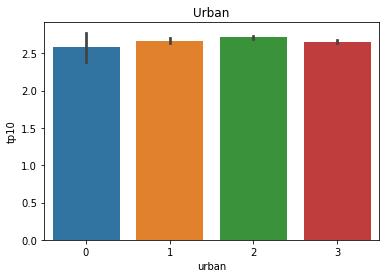

In [188]:
print(data.groupby('urban').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='urban', y='tp10', estimator=np.mean)
plt.title('Urban')
plt.show()

- 교외 > 시골=도시

familysize
1    4.373527
5    4.366972
3    4.321340
6    4.311456
0    4.308135
4    4.305890
2    4.298750
Name: tp10, dtype: float64


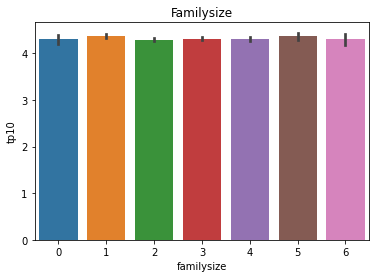

In [187]:
print(family.groupby('familysize').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = family, x='familysize', y='tp10', estimator=np.mean)
plt.title('Familysize')
plt.show()

- 구성원에 따른 차이 없어보임

gender
Male      2.760168
Female    2.593197
Name: tp10, dtype: float64


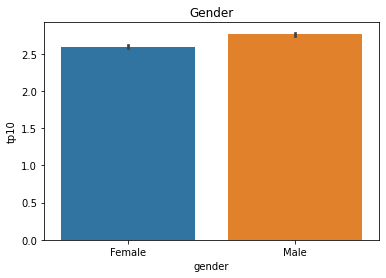

In [186]:
print(data.groupby('gender').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='gender', y='tp10', estimator=np.mean)
plt.title('Gender')
plt.show()

- 남성 > 여성

hand
0    2.708075
2    2.702899
1    2.698602
3    2.219001
Name: tp10, dtype: float64


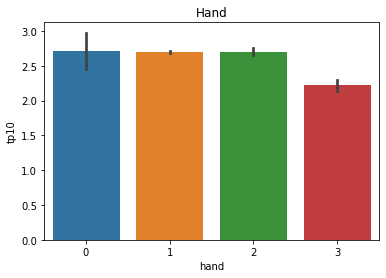

In [185]:
print(data.groupby('hand').mean()['tp10'].sort_values(ascending=False))
sns.barplot(data = data, x='hand', y='tp10', estimator=np.mean)
plt.title('Hand')
plt.show()

- 왼손 > 오른손 > 양손